## Install & Import pytrends package

https://pypi.org/project/pytrends/

In [38]:
import pandas as pd           
import matplotlib.pyplot as plt
from pytrends.request import TrendReq

Connect to google

In [29]:
pytrend = TrendReq(hl='en-US', tz=480)

# tz is time zone offset. 480 is PST

### Experimentation & Quick Examples

Interest by region

In [63]:
pytrend.build_payload(kw_list=['Taylor Swift'])

# Interest by Region
df = pytrend.interest_by_region()
df = df.head(20)
df

,Taylor Swift
geoName,
Afghanistan,0
Albania,0
Algeria,15
American Samoa,0
Andorra,0
Angola,0
Anguilla,0
Antarctica,0
Antigua & Barbuda,0


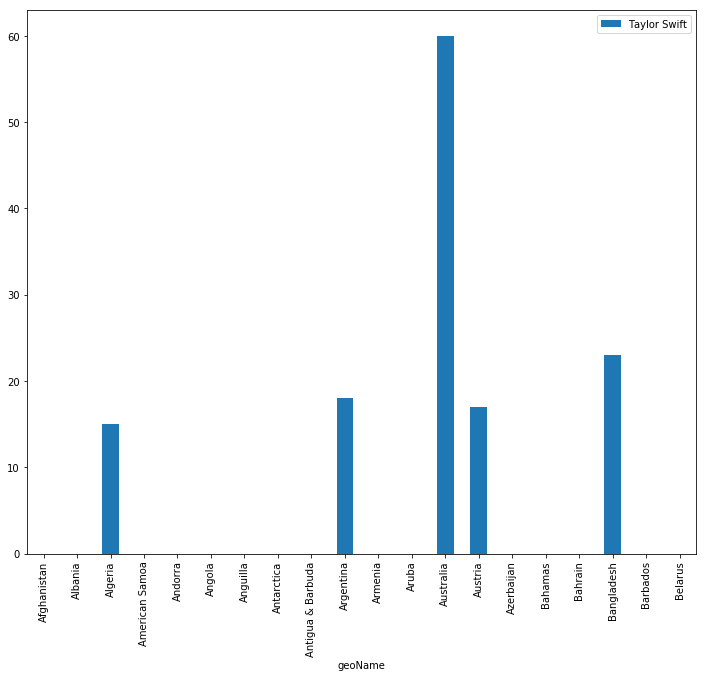

In [64]:
df.reset_index().plot(x='geoName', y='Taylor Swift', figsize=(12, 10), kind ='bar')

Search daily trends

In [26]:
# Get Google Hot Trends data
df = pytrend.trending_searches(pn='united_states')
df.head()

,0
0,Betty Wright
1,Fauci
2,Father's Day
3,Mother's Day images
4,Mother's Day message


Get just today's trending searches

In [11]:
df = pytrend.today_searches(pn='US')
pd.DataFrame(df)

,query
0,Betty Wright
1,Fauci
2,Father's Day
3,Mother's Day images
4,Mother's Day message
5,Joe Rogan
6,Kristi Noem


Find related queries

In [21]:
pytrend.build_payload(kw_list=['Coronavirus'])

# Related Queries, returns a dictionary of dataframes
related_queries = pytrend.related_queries()
related_queries.values()

dict_values([{'top':                             query  value
0              coronavirus update    100
1               coronavirus cases     71
2                news coronavirus     66
3                          corona     63
4   thank you coronavirus helpers     49
5            coronavirus symptoms     47
6               coronavirus india     46
7                  coronavirus uk     46
8                coronavirus tips     45
9                  uk coronavirus     45
10                coronavirus map     35
11                   corona virus     31
12                coronavirus usa     30
13             coronavirus italia     29
14             coronavirus france     28
15              china coronavirus     28
16              coronavirus china     27
17                 coronavirus us     27
18              world coronavirus     26
19               live coronavirus     25
20             coronavirus españa     24
21              italy coronavirus     22
22             coronavirus deaths   

In [23]:
pytrend.build_payload(kw_list=['Coronavirus'])

# Related Topics, returns a dictionary of dataframes
related_topic = pytrend.related_topics()
related_topic.values()

dict_values([{'rising':     value formattedValue                                            link  \
0  111000       Breakout  /trends/explore?q=/g/11ckxx4f1g&date=today+5-y   
1   54650       Breakout      /trends/explore?q=/m/018xnw&date=today+5-y   
2   51550       Breakout       /trends/explore?q=/m/09kvv&date=today+5-y   
3   49300       Breakout    /trends/explore?q=/g/1tfkwsf1&date=today+5-y   
4   31700       Breakout       /trends/explore?q=/m/0l3cy&date=today+5-y   
5   19450       Breakout       /trends/explore?q=/m/0bzty&date=today+5-y   
6    2000        +2,000%       /trends/explore?q=/m/03rjj&date=today+5-y   
7    1850        +1,850%       /trends/explore?q=/m/06mnr&date=today+5-y   
8     900          +900%      /trends/explore?q=/m/0222qb&date=today+5-y   
9     900          +900%       /trends/explore?q=/m/06mkj&date=today+5-y   

       topic_mid               topic_title  \
0  /g/11ckxx4f1g              Worldometers   
1      /m/018xnw                     Cubit   
2

### Building a payload

In [34]:
kw_list = ["Blockchain", "coronavirus"]
pytrend.build_payload(kw_list, cat=0, timeframe='2020-01-01 2020-05-22', geo='', gprop='')

In [41]:
results = pytrend.interest_over_time()
results

,Blockchain,coronavirus,isPartial
date,,,
2020-01-01,0,0,False
2020-01-02,0,0,False
2020-01-03,0,0,False
2020-01-04,0,0,False
2020-01-05,0,0,False
...,...,...,...
2020-05-04,0,25,False
2020-05-05,0,24,False
2020-05-06,0,24,False


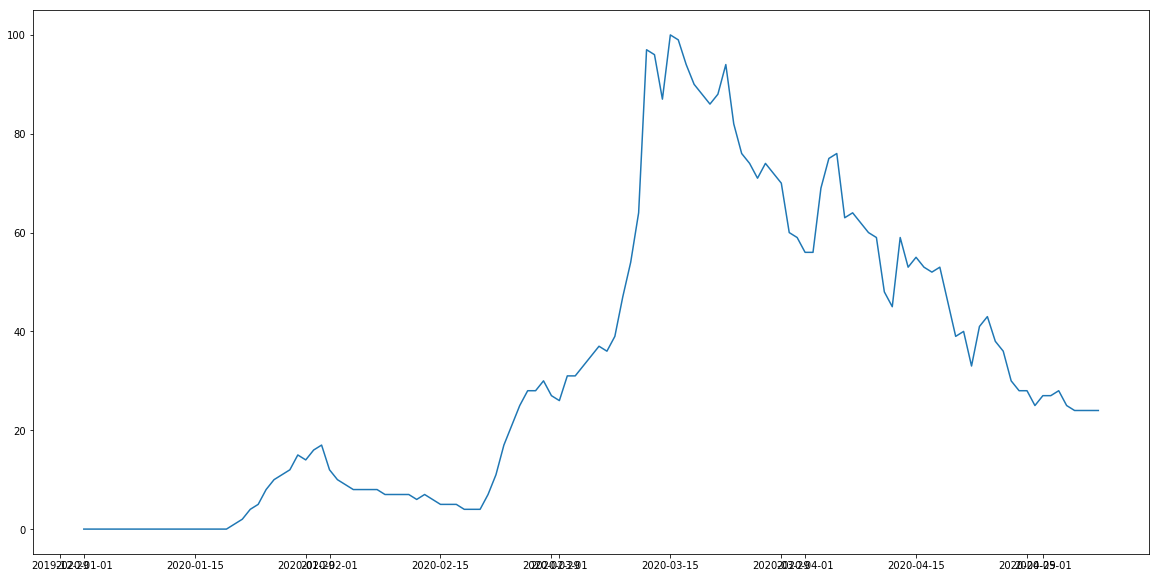

In [49]:
fig, ax = plt.subplots(figsize=(20, 10))
plt.plot(results['coronavirus'])
plt.show()